# Quick Start (oda api v1.2.2-dev0)

In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
#%matplotlib notebook


## Connection to the dispatcher 

### build the dispatcher object

In [2]:
disp=DispatcherAPI(url='https://www.astro.unige.ch/mmoda/dispatch-data',instrument='mock')

In [3]:
instr_list=disp.get_instruments_list()
for i in instr_list:
    print (i)

magic
isgri
jemx
polar
antares
spi_acs


### get the description of the instrument

In [4]:
disp.get_instrument_description('isgri')

[[{'instrumet': 'isgri'},
  {'prod_dict': {'isgri_image': 'isgri_image_query',
    'isgri_lc': 'isgri_lc_query',
    'isgri_spectrum': 'isgri_spectrum_query',
    'spectral_fit': 'spectral_fit_query'}},
  '[{"query_name": "src_query"}, {"name": "src_name", "units": "str", "value": "test"}, {"name": "RA", "units": "deg", "value": 0.0}, {"name": "DEC", "units": "deg", "value": 0.0}, {"name": "T1", "units": None, "value": "2001-12-11T00:00:00.000"}, {"name": "T2", "units": None, "value": "2001-12-11T00:00:00.000"}, {"name": "token", "units": "str", "value": None}]',
  '[{"query_name": "isgri_parameters"}, {"name": "user_catalog", "units": "str", "value": None}, {"name": "scw_list", "units": "names_list", "value": []}, {"name": "selected_catalog", "units": "str", "value": None}, {"name": "radius", "units": "deg", "value": 5.0}, {"name": "max_pointings", "units": None, "value": 50}, {"name": "osa_version", "units": "str", "value": None}, {"name": "integral_data_rights", "units": "str", "val

### get the description of the product


In [5]:
disp.get_product_description(instrument='isgri',product_name='isgri_image')

[[{'instrumet': 'isgri'},
  {'prod_dict': {'isgri_image': 'isgri_image_query',
    'isgri_lc': 'isgri_lc_query',
    'isgri_spectrum': 'isgri_spectrum_query',
    'spectral_fit': 'spectral_fit_query'}},
  '[{"query_name": "src_query"}, {"name": "src_name", "units": "str", "value": "test"}, {"name": "RA", "units": "deg", "value": 0.0}, {"name": "DEC", "units": "deg", "value": 0.0}, {"name": "T1", "units": None, "value": "2001-12-11T00:00:00.000"}, {"name": "T2", "units": None, "value": "2001-12-11T00:00:00.000"}, {"name": "token", "units": "str", "value": None}]',
  '[{"query_name": "isgri_parameters"}, {"name": "user_catalog", "units": "str", "value": None}, {"name": "scw_list", "units": "names_list", "value": []}, {"name": "selected_catalog", "units": "str", "value": None}, {"name": "radius", "units": "deg", "value": 5.0}, {"name": "max_pointings", "units": None, "value": 50}, {"name": "osa_version", "units": "str", "value": None}, {"name": "integral_data_rights", "units": "str", "val

### check query before submission
in case of error in the parameters, an error is issued

In [6]:
data_collection=disp.get_product(instrument='isgri',
                                 product='isgri_image',
                                 T1='2003-03-15T23:27:40.0',
                                 T2='2003-03-16T00:03:12.0',
                                 osa_version='OSA10.2',
                                 RA='a',
                                 DEC=-37.844167,
                                 detection_threshold=5.0,
                                 radius=15.,
                                 product_type='Real')

RequestNotUnderstood: [ RequestNotUnderstood: RequestNotUnderstood():[ InstrumentQueryBackEnd : isgri ] constructor failed: Invalid character at col 0 in angle 'a' ]

## Get ODA products
now we actually get the products with the right parameters

In [9]:
data_collection=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:15.0',
                      E1_keV=20.0,
                      E2_keV=40.0,
                      osa_version='OSA10.2',
                      RA=257.815417,
                      DEC=-41.593417,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

### the ODA data structure

In [10]:
data_collection.show()

ID=0 prod_name=mosaic_image_0_mosaic  meta_data: {'product': 'mosaic', 'instrument': 'isgri', 'src_name': '', 'query_parameters': '[{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"name": "detection_threshold", "units": "sigma", "value": "5.0"}, {"name": "image_scale_min", "units": None, "value": None}, {"name": "image_scale_max", "units": None, "value": None}]'}

ID=1 prod_name=dispatcher_catalog_1  meta_data: 



you can acess memeber by name:

In [11]:
data_collection.mosaic_image_0_mosaic

or by position in the data list

In [12]:
data_collection._p_list[0]

### the ODA catalog

In [13]:
data_collection.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str12,float64,float64,float64,int64,int64,int64,float64
68,OAO 1657-415,17.827661514282227,255.19740295410156,-41.653175354003906,-32768,2,0,0.00014000000373926014
74,4U 1700-377,21.19563102722168,255.9771270751953,-37.83724594116211,-32768,2,0,0.0002800000074785203
77,GX 349+2,13.917550086975098,256.42901611328125,-36.41566467285156,-32768,2,0,0.0002800000074785203
130,GX 354-0,8.97690486907959,262.9885559082031,-33.82877731323242,-32768,2,0,0.0002800000074785203


you can use astropy.table commands to modify the table of the catatlog http://docs.astropy.org/en/stable/table/modify_table.html

to generate a catalog to pass to the dispatcher api

In [14]:
api_cat=data_collection.dispatcher_catalog_1.get_api_dictionary()

In [15]:
api_cat

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[68, 74, 77, 130], ["OAO 1657-415", "4U 1700-377", "GX 349+2", "GX 354-0"], [17.827661514282227, 21.19563102722168, 13.917550086975098, 8.97690486907959], [255.19740295410156, 255.9771270751953, 256.42901611328125, 262.9885559082031], [-41.653175354003906, -37.83724594116211, -36.41566467285156, -33.82877731323242], [-32768, -32768, -32768, -32768], [2, 2, 2, 2], [0, 0, 0, 0], [0.00014000000373926014, 0.0002800000074785203, 0.0002800000074785203, 0.0002800000074785203]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U12"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "<f8"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

In [16]:
data_collection=disp.get_product(instrument='isgri',
                              product='isgri_image',
                              T1='2003-03-15T23:27:40.0',
                              T2='2003-03-16T00:03:15.0',
                              E1_keV=20.0,
                              E2_keV=40.0,
                              osa_version='OSA10.2',
                              RA=255.986542,
                              DEC=-37.844167,
                              detection_threshold=5.0,
                              radius=15.,
                              product_type='Real',
                              selected_catalog=api_cat)

you can explore the image with the following command

In [17]:
data_collection.mosaic_image_0_mosaic.show()

------------------------------
name: mosaic_image
meta_data dict_keys(['product', 'instrument', 'src_name', 'query_parameters'])
number of data units 6
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: GROUPING
data uniti 2 ,name: ISGR-MOSA-IMA
data uniti 3 ,name: ISGR-MOSA-IMA
data uniti 4 ,name: ISGR-MOSA-IMA
data uniti 5 ,name: ISGR-MOSA-IMA


In [18]:
data_collection.mosaic_image_0_mosaic.show_meta()

------------------------------
product : mosaic
instrument : isgri
src_name : 
query_parameters : [{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"name": "detection_threshold", "units": "sigma", "value": "5.0"}, {"name": "image_scale_min", "units": None, "value": None}, {"name": "image_scale_max", "units": None, "value": None}]
------------------------------


In [19]:
data_collection.mosaic_image_0_mosaic.data_unit[1].data

FITS_rec([('IMAGE', 'ISGR-MOSA-IMA', 1, 3, '', '', 'INTENSITY',     20,     40, 20., 30., 40., 1169.97884473, 1169.99724527, 1589., 1587.05859375),
          ('IMAGE', 'ISGR-MOSA-IMA', 2, 4, '', '', 'VARIANCE',     20,     40, 20., 30., 40., 1169.97884473, 1169.99724527, 1589., 1587.05859375),
          ('IMAGE', 'ISGR-MOSA-IMA', 3, 5, '', '', 'SIGNIFICANCE',     20,     40, 20., 30., 40., 1169.97884473, 1169.99724527, 1589., 1587.05859375),
          ('IMAGE', 'ISGR-MOSA-IMA', 4, 6, '', '', 'EXPOSURE',     20,     40, 20., 30., 40., 1169.97884473, 1169.99724527, 1589., 1587.05859375)],
         dtype=(numpy.record, [('MEMBER_XTENSION', 'S8'), ('MEMBER_NAME', 'S32'), ('MEMBER_VERSION', '>i4'), ('MEMBER_POSITION', '>i4'), ('MEMBER_LOCATION', 'S256'), ('MEMBER_URI_TYPE', 'S3'), ('IMATYPE', 'S32'), ('CHANMIN', '>i2'), ('CHANMAX', '>i2'), ('E_MIN', '>f4'), ('E_MEAN', '>f4'), ('E_MAX', '>f4'), ('TFIRST', '>f8'), ('TLAST', '>f8'), ('TELAPSE', '>f8'), ('ONTIME', '>f8')]))

In [20]:
hdu=data_collection.mosaic_image_0_mosaic.to_fits_hdu_list()

In [21]:
data_collection.mosaic_image_0_mosaic.data_unit[1].data.shape

(4,)

In [22]:
data_collection.mosaic_image_0_mosaic.write_fits_file('test.fits',overwrite=True)

### the ODA Image   plotting tool

In [23]:
#interactive
#%matplotlib notebook

%matplotlib inline
im=OdaImage(data_collection)

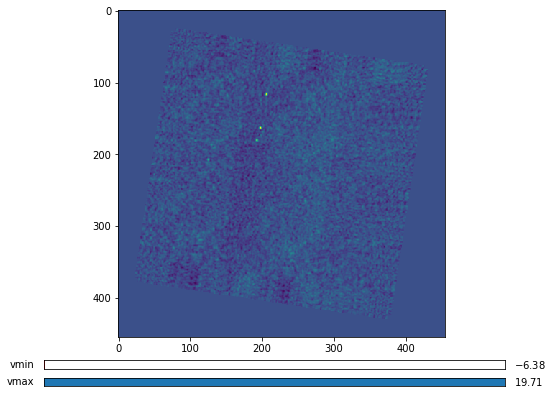

In [24]:
im.show(unit_ID=4)

In [25]:
data_collection.mosaic_image_0_mosaic.data_unit[1].header

{'BASETYPE': 'DAL_GROUP',
 'BITPIX': 8,
 'CHECKSUM': '59K3A7H157H1A7H1',
 'COMMENT': '  on the next keyword which has the name CONTINUE.',
 'CONFIGUR': 'osa_2019-07-29T14:07:33',
 'CREATOR': 'ii_skyimage 5.4.4',
 'DATASUM': '910507346',
 'DATE': '2021-09-01T13:14:08',
 'DATE-END': '2003-03-15T23:57:39',
 'DATE-OBS': '2003-03-15T23:27:53',
 'DETNAM': 'ISGRI',
 'EXTNAME': 'GROUPING',
 'EXTREL': '7.2',
 'EXTVER': 1,
 'GCOUNT': 1,
 'GRPID1': -1,
 'GRPLC1': 'ogg.fits',
 'GRPNAME': 'ISGR-MOSA-IMA-IDX',
 'IDXMEMBR': 'ISGR-MOSA-IMA',
 'INSTRUME': 'IBIS',
 'ISDCLEVL': 'IMA',
 'LONGSTRN': 'OGIP 1.0',
 'MJDREF': 51544.0,
 'NAXIS': 2,
 'NAXIS1': 387,
 'NAXIS2': 4,
 'ORIGIN': 'ISDC',
 'PCOUNT': 0,
 'STAMP': '2021-09-01T13:14:08 ii_skyimage 5.4.4',
 'TELESCOP': 'INTEGRAL',
 'TFIELDS': 16,
 'TFORM1': '8A',
 'TFORM10': '1E',
 'TFORM11': '1E',
 'TFORM12': '1E',
 'TFORM13': '1D',
 'TFORM14': '1D',
 'TFORM15': '1D',
 'TFORM16': '1D',
 'TFORM2': '32A',
 'TFORM3': '1J',
 'TFORM4': '1J',
 'TFORM5': '256A',


### the ODA LC  plotting tool

In [26]:
data_collection=disp.get_product(instrument='isgri',
                      product='isgri_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=70,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      radius=15.,
                      product_type='Real')

### explore LC

In [27]:
data_collection.show()

ID=0 prod_name=isgri_lc_0_OAO1657m415  meta_data: {'src_name': 'OAO 1657-415', 'time_bin': 0.000810143479094966, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}

ID=1 prod_name=isgri_lc_1_4U1700m377  meta_data: {'src_name': '4U 1700-377', 'time_bin': 0.000810143479094966, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}

ID=2 prod_name=isgri_lc_2_GX349p2  meta_data: {'src_name': 'GX 349+2', 'time_bin': 0.000810143479094966, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}

ID=3 prod_name=isgri_lc_3_H1705m440  meta_data: {'src_name': 'H 1705-440', 'time_bin': 0.000810143479094966, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}

ID=4 prod_name=isgri_lc_4_GX354m0  meta_data: {'src_name': 'GX 354-0', 'time_bin': 0.000810143479094966, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}

ID=5 prod_name=isgri_lc_5_GX1p4  meta_data: {'src_name': 'GX 1+4', 'time_bin': 0.000810143479094966, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}



In [28]:
data_collection.isgri_lc_2_GX349p2.show()

------------------------------
name: isgri_lc
meta_data dict_keys(['src_name', 'time_bin', 'time', 'rate', 'rate_err'])
number of data units 2
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: ISGR-SRC.-LCR


In [29]:
for ID,s in enumerate(data_collection._p_list):
    print (ID,s.meta_data['src_name'])

0 OAO 1657-415
1 4U 1700-377
2 GX 349+2
3 H 1705-440
4 GX 354-0
5 GX 1+4


In [30]:
lc=data_collection._p_list[0]
lc.data_unit[1].data

array([(1169.97924981, 189.06061, 208.61382 , 3.0928352, 36.32327 , 8.367494 , 0.9999995, 0.00040507, 0.00081014),
       (1169.98006   , 184.00623, 128.52094 , 3.0739527, 44.749542, 8.25954  , 0.9999995, 0.00040507, 0.00081014),
       (1169.98087017, 156.61322, 107.2609  , 2.7437818, 19.096039, 7.5178704, 0.9999995, 0.00040507, 0.00081014),
       (1169.98168037, 160.68495, 113.83268 , 2.8039339, 19.251225, 7.650763 , 0.9999995, 0.00040507, 0.00081014),
       (1169.98249057, 169.17253, 113.41755 , 2.8749352, 25.947037, 7.839797 , 0.9999995, 0.00040507, 0.00081014),
       (1169.98330074, 161.08427, 107.967094, 2.8938215, 23.221224, 7.6593533, 0.9999995, 0.00040507, 0.00081014),
       (1169.98411092, 168.77126, 117.82072 , 2.8845947, 31.26426 , 7.8425374, 0.9999995, 0.00040507, 0.00081014),
       (1169.98492112, 160.38077, 115.27191 , 2.942873 , 25.611507, 7.637102 , 0.9999995, 0.00040507, 0.00081014),
       (1169.9857313 , 159.43456, 114.650406, 2.8541234, 25.057646, 7.6175227, 0

In [31]:
lc.show()

------------------------------
name: isgri_lc
meta_data dict_keys(['src_name', 'time_bin', 'time', 'rate', 'rate_err'])
number of data units 2
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: ISGR-SRC.-LCR


In [32]:
lc.meta_data

{'src_name': 'OAO 1657-415',
 'time_bin': 0.000810143479094966,
 'time': 'TIME',
 'rate': 'RATE',
 'rate_err': 'ERROR'}

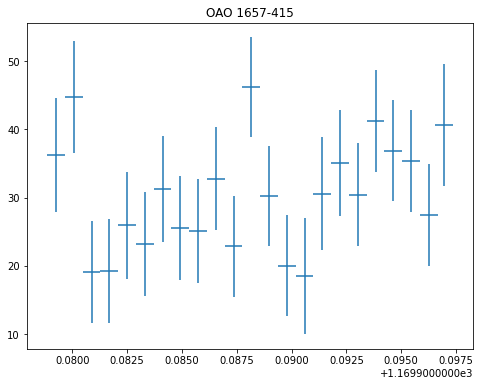

In [33]:
%matplotlib inline
OdaLightCurve(lc).show(unit_ID=1)

In [34]:
lc.data_unit[0].header

{'BITPIX': 8, 'EXTEND': True, 'NAXIS': 0, 'SIMPLE': True}

### Polar LC

In [35]:
data_collection=disp.get_product(instrument='polar',product='polar_lc',T1='2016-12-18T08:32:21.000',T2='2016-12-18T08:34:01.000',time_bin=0.5,verbose=True)

In [36]:
data_collection.show()

ID=0 prod_name=polar_lc_0_lc  meta_data: {'src_name': 'lc', 'time_bin': 0.5, 'time': 'time', 'rate': 'rate', 'rate_err': 'rate_err'}

ID=1 prod_name=polar_lc_1  meta_data: 



In [37]:
data_collection._p_list[0].meta_data

{'src_name': 'lc',
 'time_bin': 0.5,
 'time': 'time',
 'rate': 'rate',
 'rate_err': 'rate_err'}

In [38]:
lc=data_collection._p_list[0]
root=data_collection._p_list[1]
open('lc.root', "wb").write(root)

5022

In [39]:
 open('lc.root', "wb").write(root)

5022

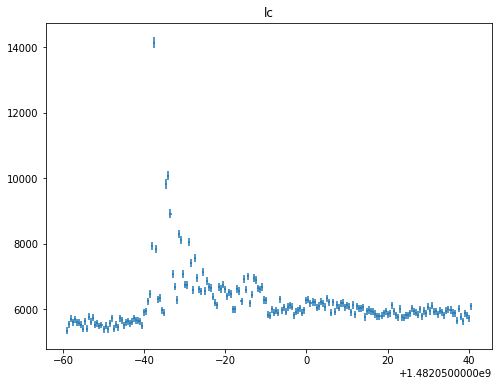

In [40]:
%matplotlib inline
OdaLightCurve(lc).show(unit_ID=1)

### SPIACS LC

In [41]:
disp.get_instrument_description('spi_acs')

[[{'instrumet': 'spi_acs'},
  {'prod_dict': {'spi_acs_lc': 'spi_acs_lc_query'}},
  '[{"query_name": "src_query"}, {"name": "src_name", "units": "str", "value": "test"}, {"name": "RA", "units": "deg", "value": 0.0}, {"name": "DEC", "units": "deg", "value": 0.0}, {"name": "T1", "units": None, "value": "2001-12-11T00:00:00.000"}, {"name": "T2", "units": None, "value": "2001-12-11T00:00:00.000"}, {"name": "token", "units": "str", "value": None}]',
  '[{"query_name": "spiacs_parameters"}, {"name": "user_catalog", "units": "str", "value": None}, {"name": None, "units": "names_list", "value": []}, {"name": "selected_catalog", "units": "str", "value": None}]',
  '[{"query_name": "spi_acs_lc_query"}, {"product_name": "spi_acs_lc"}, {"name": "time_bin", "units": "sec", "value": 1000.0}]']]

In [42]:
data_collection=disp.get_product(instrument='spi_acs',
                      product='spi_acs_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-15T23:57:12.0',
                      time_bin=2,
                      RA=255.986542,
                      DEC=-37.844167,
                      product_type='Real')

In [43]:
data_collection.show()

ID=0 prod_name=spi_acs_lc_0_query  meta_data: {'src_name': 'query', 'time_bin': 2.0, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}



In [44]:
lc=data_collection._p_list[0]


In [45]:
lc.meta_data

{'src_name': 'query',
 'time_bin': 2.0,
 'time': 'TIME',
 'rate': 'RATE',
 'rate_err': 'ERROR'}

In [46]:
lc.show()

------------------------------
name: 
meta_data dict_keys(['src_name', 'time_bin', 'time', 'rate', 'rate_err'])
number of data units 2
------------------------------
data uniti 0 ,name: Primary
data uniti 1 ,name: RATE


In [47]:
lc.data_unit[1].header

{'BITPIX': 8,
 'DATE-END': '2003-03-15T23:28:44.216',
 'DATE-OBS': '2003-03-15T23:28:44.216',
 'EXTNAME': 'RATE',
 'GCOUNT': 1,
 'INSTRUME': 'SPI-ACS',
 'MJDREF': 51544.0,
 'NAXIS': 2,
 'NAXIS1': 24,
 'NAXIS2': 886,
 'ONTIME': 1772.0008558046072,
 'PCOUNT': 0,
 'TASSIGN': 'SATELLITE',
 'TELESCOP': 'INTEGRAL',
 'TFIELDS': 3,
 'TFORM1': 'D',
 'TFORM2': 'D',
 'TFORM3': 'D',
 'TIMEDEL': 2.0,
 'TIMEREF': 'LOCAL',
 'TIMESYS': 'TT',
 'TIMEUNIT': 's',
 'TIMEZERO': 101087010.19105513,
 'TSTART': 101086124.21562724,
 'TSTOP': 101087896.21648304,
 'TTYPE1': 'TIME',
 'TTYPE2': 'RATE',
 'TTYPE3': 'ERROR',
 'XTENSION': 'BINTABLE'}

In [48]:
lc.data_unit[1].data[0:10]

array([(-885.00042667, 1515580., 870.51134398),
       (-883.00042573, 1509680., 868.81528532),
       (-881.00042474, 1523800., 872.86883322),
       (-879.00042396, 1513890., 870.02586168),
       (-877.00042318, 1506440., 867.88248052),
       (-875.00042222, 1520350., 871.88015231),
       (-873.0004213 , 1510580., 869.07422008),
       (-871.00042036, 1516300., 870.71809445),
       (-869.00041942, 1526480., 873.63607984),
       (-867.00041848, 1508970., 868.6109601 )],
      dtype=[('TIME', '<f8'), ('RATE', '<f8'), ('ERROR', '<f8')])

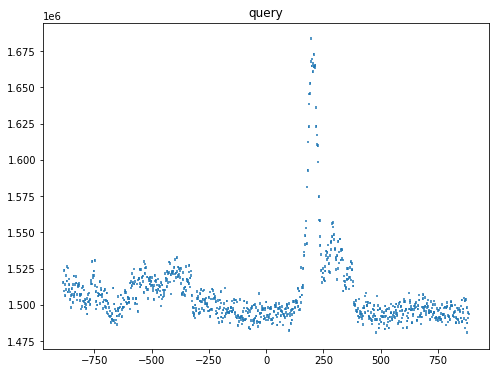

In [49]:
OdaLightCurve(lc).show(unit_ID=1)

### the ODA  and spectra

In [50]:
data_collection=disp.get_product(instrument='isgri',
                      product='isgri_spectrum',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      radius=15.,
                      product_type='Real')

### explore spectra

In [51]:
data_collection.show()

ID=0 prod_name=isgri_spectrum_0_OAO1657m415_isgri_spectrum  meta_data: {'src_name': 'OAO 1657-415', 'product': 'isgri_spectrum'}

ID=1 prod_name=isgri_spectrum_1_OAO1657m415_isgri_arf  meta_data: {'src_name': 'OAO 1657-415', 'product': 'isgri_arf'}

ID=2 prod_name=isgri_spectrum_2_OAO1657m415_isgri_rmf  meta_data: {'src_name': 'OAO 1657-415', 'product': 'isgri_rmf'}

ID=3 prod_name=isgri_spectrum_3_4U1700m377_isgri_spectrum  meta_data: {'src_name': '4U 1700-377', 'product': 'isgri_spectrum'}

ID=4 prod_name=isgri_spectrum_4_4U1700m377_isgri_arf  meta_data: {'src_name': '4U 1700-377', 'product': 'isgri_arf'}

ID=5 prod_name=isgri_spectrum_5_4U1700m377_isgri_rmf  meta_data: {'src_name': '4U 1700-377', 'product': 'isgri_rmf'}

ID=6 prod_name=isgri_spectrum_6_GX349p2_isgri_spectrum  meta_data: {'src_name': 'GX 349+2', 'product': 'isgri_spectrum'}

ID=7 prod_name=isgri_spectrum_7_GX349p2_isgri_arf  meta_data: {'src_name': 'GX 349+2', 'product': 'isgri_arf'}

ID=8 prod_name=isgri_spectrum_8_

In [52]:
d=data_collection._p_list[0]

In [53]:
d.meta_data

{'src_name': 'OAO 1657-415', 'product': 'isgri_spectrum'}

we can select all the products for the same soruce name and build a new data collection on-the-fly with a single instruction

In [54]:
data_sel=data_collection.new_from_metadata('src_name','4U 1700-377')


In [55]:
data_sel.show()


ID=0 prod_name=prod_0_4U1700m377_isgri_spectrum  meta_data: {'src_name': '4U 1700-377', 'product': 'isgri_spectrum'}

ID=1 prod_name=prod_1_4U1700m377_isgri_arf  meta_data: {'src_name': '4U 1700-377', 'product': 'isgri_arf'}

ID=2 prod_name=prod_2_4U1700m377_isgri_rmf  meta_data: {'src_name': '4U 1700-377', 'product': 'isgri_rmf'}



and we can save all these products 

In [56]:
data_sel.save_all_data()

In [57]:
d=data_collection._p_list[3]

In [58]:
d.data_unit[1].header

{'ANCRFILE': 'NONE',
 'AREASCAL': 1,
 'BACKFILE': 'NONE',
 'BACKSCAL': 1,
 'BASETYPE': 'DAL_TABLE',
 'BITPIX': 8,
 'BKGPARAM': 'rebinned_back_spe.fits',
 'CHANTYPE': 'PI',
 'CHECKSUM': '9kKSIjKQ9jKQGjKQ',
 'COMMENT': '  on the next keyword which has the name CONTINUE.',
 'CONFIGUR': 'osa_2019-07-29T14:07:33',
 'CORRFILE': 'NONE',
 'CORRSCAL': 0,
 'CREATOR': 'ISGRISpectraSum.v5.4.2.3.extractall',
 'DATASUM': '2445425117',
 'DATE': '2021-09-01T13:26:15.942451',
 'DEADC': 0.775885283090927,
 'DEC_OBJ': -37.8394165039062,
 'DETCHANS': 62,
 'DETNAM': 'ISGRI',
 'EQUINOX': 2000.0,
 'EXPOSURE': 1198.97207125461,
 'EXP_SRC': 610.283081054688,
 'EXTNAME': 'ISGR-EVTS-SPE',
 'EXTREL': '10.4',
 'EXTVER': 2,
 'FILTER': 'none',
 'FITTYPE': 6,
 'GCOUNT': 1,
 'GRPID1': 1,
 'HDUCLAS1': 'SPECTRUM',
 'HDUCLAS2': 'TOTAL',
 'HDUCLAS3': 'RATE',
 'HDUCLASS': 'OGIP',
 'HDUVERS': '1.2.2-dev0',
 'INSTRUME': 'IBIS',
 'ISDCLEVL': 'SPE',
 'LONGSTRN': 'OGIP 1.0',
 'MJDREF': 51544.0,
 'NAME': '4U 1700-377',
 'NAXIS':

### JEM-X test

In [59]:
disp.get_instrument_description('jemx')

[[{'instrumet': 'jemx'},
  {'prod_dict': {'jemx_image': 'jemx_image_query',
    'jemx_lc': 'jemx_lc_query',
    'jemx_spectrum': 'jemx_spectrum_query',
    'spectral_fit': 'spectral_fit_query'}},
  '[{"query_name": "src_query"}, {"name": "src_name", "units": "str", "value": "test"}, {"name": "RA", "units": "deg", "value": 0.0}, {"name": "DEC", "units": "deg", "value": 0.0}, {"name": "T1", "units": None, "value": "2001-12-11T00:00:00.000"}, {"name": "T2", "units": None, "value": "2001-12-11T00:00:00.000"}, {"name": "token", "units": "str", "value": None}]',
  '[{"query_name": "jemx_parameters"}, {"name": "user_catalog", "units": "str", "value": None}, {"name": "scw_list", "units": "names_list", "value": []}, {"name": "selected_catalog", "units": "str", "value": None}, {"name": "radius", "units": "deg", "value": 5.0}, {"name": "max_pointings", "units": None, "value": 50}, {"name": "osa_version", "units": "str", "value": None}, {"name": "integral_data_rights", "units": "str", "value": "pu

In [60]:
data_collection=disp.get_product(instrument='jemx',
                      jemx_num='2',
                      product='jemx_lc',
                      scw_list=['010200230010.001'],
                      osa_version='OSA10.2',
                      radius=15.,
                      product_type='Real')

In [61]:
data_collection.show()

ID=0 prod_name=jemx_lc_0_String  meta_data: {'src_name': 'String', 'time_bin': 0.01157407, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}



In [62]:
data_collection=disp.get_product(instrument='jemx',
                      jemx_num='2',
                      product='jemx_spectrum',
                      scw_list=['010200230010.001'],
                      osa_version='OSA10.2',
                      radius=15.,
                      product_type='Real')

In [63]:
data_collection.show()

ID=0 prod_name=jemx_spectrum_0_Crab_jemx_spectrum  meta_data: {'src_name': 'Crab', 'product': 'jemx_spectrum'}

ID=1 prod_name=jemx_spectrum_1_Crab_jemx_arf  meta_data: {'src_name': 'Crab', 'product': 'jemx_arf'}

ID=2 prod_name=jemx_spectrum_2_Crab_jemx_rmf  meta_data: {'src_name': 'Crab', 'product': 'jemx_rmf'}



# This is an example of spectral analysis with threeML

In [64]:
from threeML.plugins.OGIPLike import  OGIPLike
from threeML.io.package_data import get_path_of_data_file
from threeML import *
#warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pylab as plt

[WARNING ] The naima package is not available. Models that depend on it will not be available
[WARNING ] The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.
[WARNING ] The ebltable package is not available. Models that depend on it will not be available
[INFO    ] Starting 3ML!
[WARNING ] ROOT minimizer not available
[WARNING ] PyGMO is not available
[WARNING ] The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)
[WARNING ] Could not import plugin FermiLATLike.py. Do you have the relative instrument software installed and configured?
[WARNING ] Could not import plugin HAWCLike.py. Do you have the relative instrument software installed and configured?


In [65]:
ogip_data = OGIPLike('ogip',
                     observation='prod_0_4U1700m377_isgri_spectrum.fits',
                     arf_file= 'prod_1_4U1700m377_isgri_arf.fits' ,
                     response= 'prod_2_4U1700m377_isgri_rmf.fits')

[WARNING ] unable to find SPECTRUM extension: not OGIP PHA!
[WARNING ] File has no SPECTRUM extension, but found a spectrum in extension ISGR-EVTS-SPE
[WARNING ] Found TSTOP and TELAPSE. This file is invalid. Using TSTOP.
[WARNING ] POISSERR is not set. Assuming non-poisson errors as given in the STAT_ERR column
[WARNING ] The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: 'PRIMARY' 'GROUPING' 'SPECRESP MATRIX' 'EBOUNDS'
[INFO    ] Auto-probed noise models:
[INFO    ] - observation: gaussian
[INFO    ] - background: None


In [66]:
ogip_data.set_active_measurements('20-60')


[INFO    ] Range 20-60 translates to channels 7-24


[INFO    ] bad channels shown in red hatching




WARNING RuntimeWarning: invalid value encountered in sqrt


WARNING UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



(1e-05, 10)

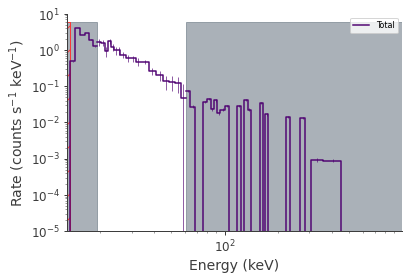

In [67]:
ogip_data.view_count_spectrum()
plt.ylim(1E-5,10)


In [68]:
fit_function = Cutoff_powerlaw()

# define the point source
point_source = PointSource('ps', 0, 0, spectral_shape=fit_function)

#define the model
model = Model(point_source)

# create a data list
datalist = DataList(ogip_data)

# make the joint likelihood
jl = JointLikelihood(model, datalist)

#fit
jl.fit();

[INFO    ] set the minimizer to minuit
[WARNING ] 4.22 percent of samples have been thrown away because they failed the constraints on the parameters. This results might not be suitable for error propagation. Enlarge the boundaries until you loose less than 1 percent of the samples.
Best fit values:



,result,unit
parameter,,
ps.spectrum.main.Cutoff_powerlaw.K,0.005 -0.005 +4,1 / (cm2 keV s)
ps.spectrum.main.Cutoff_powerlaw.index,0.2 +/- 2.8,
ps.spectrum.main.Cutoff_powerlaw.xc,(1.1 -0.7 +1.7) x 10,keV



Correlation matrix:



1.00,-1.00,0.99
-1.00,1.00,-1.00
0.99,-1.00,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
ogip,4.390866
total,4.390866



Values of statistical measures:



,statistical measures
AIC,16.496017
BIC,17.452847



WARNING MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



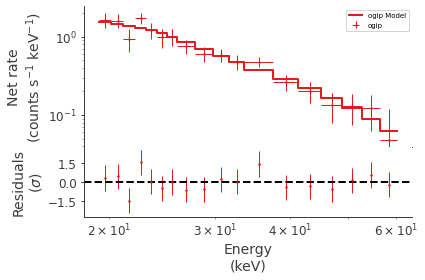

In [69]:
display_spectrum_model_counts(jl, step=True);


[ERROR   ] plot_point_source_spectra() has been replaced by plot_spectra().


processing MLE analyses:   0%|                            | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/100 [00:00<?, ?it/s]

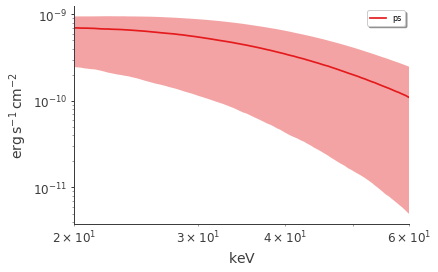

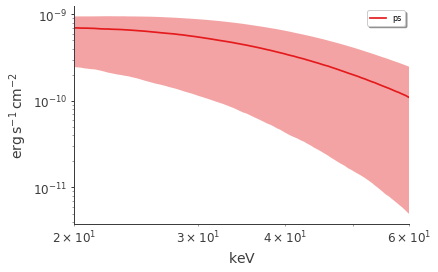

In [70]:
plot_point_source_spectra(jl.results, ene_min=20, ene_max=60, num_ene=100,
                          flux_unit='erg / (cm2 s)')

In [71]:

# A uniform prior can be defined directly, like:
model.ps.spectrum.main.Cutoff_powerlaw.index.prior = Uniform_prior(lower_bound=-2.,
                                                                     upper_bound=2.)

# or it can be set using the currently defined boundaries
model.ps.spectrum.main.Cutoff_powerlaw.xc.prior=  Log_uniform_prior(lower_bound=1,
                                                                     upper_bound=100)


# The same for the Log_uniform prior
model.ps.spectrum.main.Cutoff_powerlaw.K.prior = Log_uniform_prior(lower_bound=1e-3,
                                                                     upper_bound=100)


model.display()

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (3):
--------------------

                                           value min_value max_value  \
ps.spectrum.main.Cutoff_powerlaw.K      0.005445       0.0    1000.0   
ps.spectrum.main.Cutoff_powerlaw.index  0.188702     -10.0      10.0   
ps.spectrum.main.Cutoff_powerlaw.xc     10.82301       1.0      None   

                                                  unit  
ps.spectrum.main.Cutoff_powerlaw.K      keV-1 s-1 cm-2  
ps.spectrum.main.Cutoff_powerlaw.index                  
ps.spectrum.main.Cutoff_powerlaw.xc                keV  

Fixed parameters (4):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

In [72]:
bs = BayesianAnalysis(model, datalist)

[WARNING ] External parameter cons_ogip already exist in the model. Overwriting it...


In [73]:
bs.set_sampler("multinest")
bs.sampler.setup(n_live_points=500)
bs.sample()


[INFO    ] sampler set to multinest
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  500
 dimensionality =    3
 *****************************************************
  analysing data from chains/fit-.txt ln(ev)=  -11.862533639413844      +/-  0.11122341917410335     
 Total Likelihood Evaluations:         7493
 Sampling finished. Exiting MultiNest

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
ps.spectrum.main.Cutoff_powerlaw.K,(1.7 -1.7 +2.2) x 10^-1,1 / (cm2 keV s)
ps.spectrum.main.Cutoff_powerlaw.index,(-6 +/- 10) x 10^-1,
ps.spectrum.main.Cutoff_powerlaw.xc,(1.9 +/- 0.9) x 10,keV



Values of -log(posterior) at the minimum:



,-log(posterior)
ogip,-2.457204
total,-2.457204



Values of statistical measures:



,statistical measures
AIC,12.628695
BIC,13.585524
DIC,-10870.282000
PDIC,-10881.214804
log(Z),-5.151833



WARNING MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()



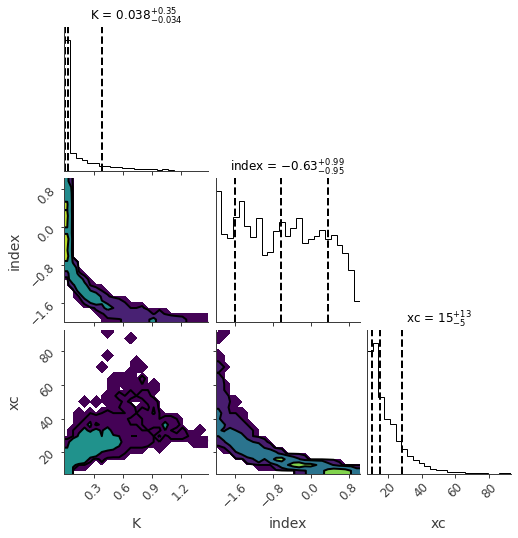

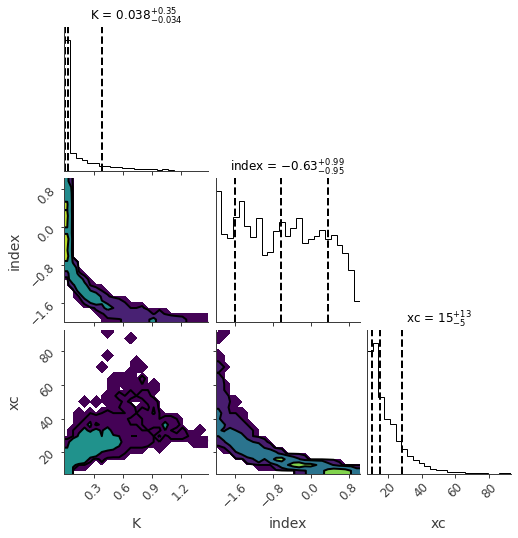

In [74]:
bs.results.corner_plot()

[ERROR   ] plot_point_source_spectra() has been replaced by plot_spectra().


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/100 [00:00<?, ?it/s]

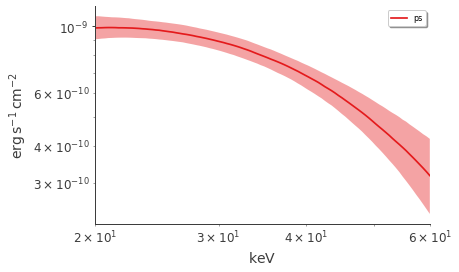

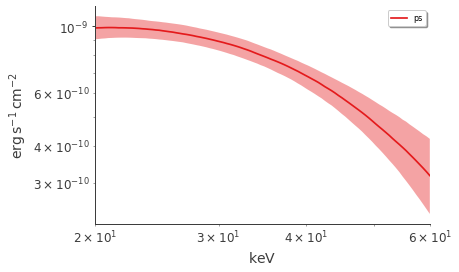

In [75]:
plot_point_source_spectra(bs.results, ene_min=20, ene_max=60, num_ene=100,
                          flux_unit='erg / (cm2 s)')

In [76]:
fluxes_bs = bs.results.get_point_source_flux(100 * u.keV, 1 * u.MeV)

[ERROR   ] get_point_source_flux() has been replaced by get_flux()


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

In [77]:
fluxes_bs

,flux,low bound,hi bound
ps: total,7.98682085812617e-12 erg / (cm2 s),2.2496983896203776e-12 erg / (cm2 s),3.2021187085022926e-11 erg / (cm2 s)
